<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial2.ipynb)   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial2.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

# Tutorial 2:  Building and Training Random Forest Models

**Week 2, Day 4, AI and Climate Change**

**Content creators:**  Deepak Mewada, Grace Lindsay

**Content reviewers:** Mujeeb Abdulfatai, Nkongho Ayuketang Arreyndip, Jeffrey N. A. Aryee, Paul Heubel, Jenna Pearson, Abel Shibu

**Content editors:** Deepak Mewada, Grace Lindsay

**Production editors:** Paul Heubel, Konstantine Tsafatinos

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 35 minutes

In this tutorial, you will    
* Learn about decision trees and hyperparameters
* Learn about random forest models
* Understand how regression models are evaluated (R$^2$)
* Familiarize yourself with the scikit-learn package


# Setup

In [1]:
# imports
import matplotlib.pyplot as plt                           # For plotting graphs
import pandas as pd                                       # For data manipulation
import ipywidgets as widgets                              # interactive display
from sklearn.ensemble import RandomForestRegressor        # For Random Forest Regression
from sklearn.tree import DecisionTreeRegressor            # For Decision Tree Regression
from sklearn.tree import plot_tree                        # For plotting decision trees

In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D4_T2"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.0 MB/s eta 0:00:00


In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [4]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import numpy as np

def set_seed(seed=None):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    print(f'Random seed {seed} has been set.')

# Set a global seed value for reproducibility
random_state = 42 # change 42 with any number you like

set_seed(seed=random_state)

Random seed 42 has been set.


In [5]:
# @title Video 1: Building and training Random Forest Models

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == 'Bilibili':
            src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
        elif source == 'Osf':
            src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents

video_ids = [('Youtube', '3QBXMylmH-Q'), ('Bilibili', 'BV1dwGDeoEmj'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Building_Training_Random_Forest_Models_Video")

In [7]:
# @title Tutorial slides

# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "kyv6w"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/kyv6w/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Building_Training_Random_Forest_Models_Slides")

# Section 1: Preparing the Data for Model Training

In this video, we learned about:

1. Using regression for prediction tasks, like the one we have.
2. The conceptual understanding of decision trees and their regression capabilities.
3. Random forests as an ensemble of decision trees.
4. Training our model
4. Measuring model performance.
5. Utilizing the scikit-learn toolbox for regression tasks.


## Section 1.1: Loading the data

Remember from the previous tutorial how we loaded the `training_data`?
Let's again load the data here for this tutorial.

In [9]:
#Load Dataset
url_Climatebench_train_val = "https://osf.io/y2pq7/download"
training_data = pd.read_csv(url_Climatebench_train_val)

Next, we will prepare the data to train a model to predict temperature anomalies in 2050. Let's also remind ourselves of what the data contains:

## Section 1.2: Preparing the data

In [10]:
# Check column names (assuming a pandas DataFrame)
print("Column names:")
print(training_data.columns.tolist())  # List all column names

Column names:
['scenario', 'lat', 'lon', 'tas_2015', 'pr_2015', 'pr90_2015', 'dtr_2015', 'tas_FINAL', 'CO2_2015', 'SO2_2015', 'CH4_2015', 'BC_2015', 'CO2_2016', 'SO2_2016', 'CH4_2016', 'BC_2016', 'CO2_2017', 'SO2_2017', 'CH4_2017', 'BC_2017', 'CO2_2018', 'SO2_2018', 'CH4_2018', 'BC_2018', 'CO2_2019', 'SO2_2019', 'CH4_2019', 'BC_2019', 'CO2_2020', 'SO2_2020', 'CH4_2020', 'BC_2020', 'CO2_2021', 'SO2_2021', 'CH4_2021', 'BC_2021', 'CO2_2022', 'SO2_2022', 'CH4_2022', 'BC_2022', 'CO2_2023', 'SO2_2023', 'CH4_2023', 'BC_2023', 'CO2_2024', 'SO2_2024', 'CH4_2024', 'BC_2024', 'CO2_2025', 'SO2_2025', 'CH4_2025', 'BC_2025', 'CO2_2026', 'SO2_2026', 'CH4_2026', 'BC_2026', 'CO2_2027', 'SO2_2027', 'CH4_2027', 'BC_2027', 'CO2_2028', 'SO2_2028', 'CH4_2028', 'BC_2028', 'CO2_2029', 'SO2_2029', 'CH4_2029', 'BC_2029', 'CO2_2030', 'SO2_2030', 'CH4_2030', 'BC_2030', 'CO2_2031', 'SO2_2031', 'CH4_2031', 'BC_2031', 'CO2_2032', 'SO2_2032', 'CH4_2032', 'BC_2032', 'CO2_2033', 'SO2_2033', 'CH4_2033', 'BC_2033', 'CO2_

First, we will drop the `scenario` column from the data as it is just a label, but will not be passed into the model.

In [11]:
training_data.pop('scenario')

,scenario
0,ssp126
1,ssp126
2,ssp126
3,ssp126
4,ssp126
...,...
3235,ssp370-lowNTCF
3236,ssp370-lowNTCF
3237,ssp370-lowNTCF
3238,ssp370-lowNTCF


As we can see, scenario is no longer in the dataset:

In [12]:
print("Column names:")
print(training_data.columns.tolist())  # List all column names

Column names:
['lat', 'lon', 'tas_2015', 'pr_2015', 'pr90_2015', 'dtr_2015', 'tas_FINAL', 'CO2_2015', 'SO2_2015', 'CH4_2015', 'BC_2015', 'CO2_2016', 'SO2_2016', 'CH4_2016', 'BC_2016', 'CO2_2017', 'SO2_2017', 'CH4_2017', 'BC_2017', 'CO2_2018', 'SO2_2018', 'CH4_2018', 'BC_2018', 'CO2_2019', 'SO2_2019', 'CH4_2019', 'BC_2019', 'CO2_2020', 'SO2_2020', 'CH4_2020', 'BC_2020', 'CO2_2021', 'SO2_2021', 'CH4_2021', 'BC_2021', 'CO2_2022', 'SO2_2022', 'CH4_2022', 'BC_2022', 'CO2_2023', 'SO2_2023', 'CH4_2023', 'BC_2023', 'CO2_2024', 'SO2_2024', 'CH4_2024', 'BC_2024', 'CO2_2025', 'SO2_2025', 'CH4_2025', 'BC_2025', 'CO2_2026', 'SO2_2026', 'CH4_2026', 'BC_2026', 'CO2_2027', 'SO2_2027', 'CH4_2027', 'BC_2027', 'CO2_2028', 'SO2_2028', 'CH4_2028', 'BC_2028', 'CO2_2029', 'SO2_2029', 'CH4_2029', 'BC_2029', 'CO2_2030', 'SO2_2030', 'CH4_2030', 'BC_2030', 'CO2_2031', 'SO2_2031', 'CH4_2031', 'BC_2031', 'CO2_2032', 'SO2_2032', 'CH4_2032', 'BC_2032', 'CO2_2033', 'SO2_2033', 'CH4_2033', 'BC_2033', 'CO2_2034', 'SO2_

Next, we need to pull out our target variable (that is, the variable we want our model to predict). Here that is `tas_FINAL`, the temperature anomaly in 2050.  The anomalies in every case are calculated by subtracting the annual means of the pre-industrial scenario from the annual means of the respective scenario of interest.

In [13]:
target = training_data.pop('tas_FINAL')
target

,tas_FINAL
0,0.848419
1,0.737915
2,0.588806
3,0.522766
4,0.776642
...,...
3235,1.626139
3236,1.804036
3237,1.925557
3238,2.026601


*Note: we will need to repeat these preprocessing steps anytime we load this (or other) data.*

# Section 2: Fit Decision Tree and Random Forest

Now we can train our models. As mentioned in the video, Decision Trees and Random Forest Models can both do regression. Specifically:

***Decision Tree Regression***:   
* Decision trees recursively partition the feature space into regions based on feature values to predict the target variable.
* Each leaf node represents a prediction.
* Single trees can be prone to capturing noise in the data (not what we want!).  

***Random Forest Regression***:   
* An ensemble method that combines multiple decision trees to improve predictive performance.
* Each tree is trained on a random subset of the data.
* Aggregates predictions of individual trees to improve performance.
* Typically more robust/doesn't capture noise.

We will see an example of both here.



First, let's train a single decision tree to try to predict 2050 temperature anomalies using 2015 temperature anomalies and emissions data. We can control the depth of our decision tree (which is the maximum number of splits performed), which we will set to 20 here.

## Section 2.0: Scikit-learn

In this and coming sub-sections, we will utilize [Scikit-learn](https://scikit-learn.org/stable/), commonly referred to as `sklearn`, a renowned Python library extensively employed for machine learning endeavors. It provides a comprehensive array of functions and tools tailored for various machine learning tasks. Specifically, we will concentrate on the [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) modules offered by Scikit-learn.

## Section 2.1: Training the Decision Tree and Analyzing the Results

In [14]:
# instantiate the model:
dt_regressor = DecisionTreeRegressor(random_state=random_state,max_depth=20)

# fit/train the model with the data:
dt_regressor.fit(training_data, target) #pass in the model inputs and the target it should predict

DecisionTreeRegressor(max_depth=20, random_state=42)

We've trained our first model! Now let's see how well it performs. As discussed in the video, we will use the coefficient of determination (also known as the R-squared value, $R^2$) as the measure of how well the model is doing.

We can get this value by calling the `score` function and providing the data we want the score calculated on. Here we will evaluate the model on the same data it was trained on.

<details>
<summary> <font color='lightGreen'>Learn more about the R-Squared value and Coefficient of determination   </font></summary>


 The **R-squared** value indicates the proportion of the variance in the target variable that is predicted from the model.

Specifically, the ***coefficient of determination*** is calculated using the formula:

$$
\color{#3182CE}{R^2} = 1 - \frac{\color{#DC3912}{SS_{\text{residual}}}}{\color{#FF9900}{SS_{\text{total}}}}
$$

where:
- $\color{#FF9900}{SS_{\text{total}}}$ represents the total sum of squares, calculated as the sum of squared differences between the target variable $\color{#2CA02C}{y}$ and its mean $\color{#2CA02C}{\bar{y}}$:

$$
\color{#FF9900}{SS_{\text{total}}} = \sum_{i=1}^{n} (\color{#2CA02C}{y_i} - \color{#2CA02C}{\bar{y}})^2
$$

- $\color{#DC3912}{SS_{\text{residual}}}$ denotes the residual sum of squares, computed as the sum of squared differences between the observed target values $\color{#2CA02C}{y}$ and the predicted values $\color{#FF5733}{\hat{y}}$ provided by the model:

$$
\color{#DC3912}{SS_{\text{residual}}} = \sum_{i=1}^{n} (\color{#2CA02C}{y_i} - \color{#FF5733}{\hat{y}_i})^2
$$

The $\color{#3182CE}{R^2}$ score thus quantifies the proportion of variance in the target variable that is predictable from the independent variables in the model.

This value ranges from 0 to 1, where 1 indicates a perfect fit, meaning the model explains all the variability in the target variable.
</details>

---

In [15]:
dt_regressor.score(training_data, target)

0.999864843337056


Now, let's create a scatter plot to compare the true temperature anomaly values in 2050 to those predicted by the model:


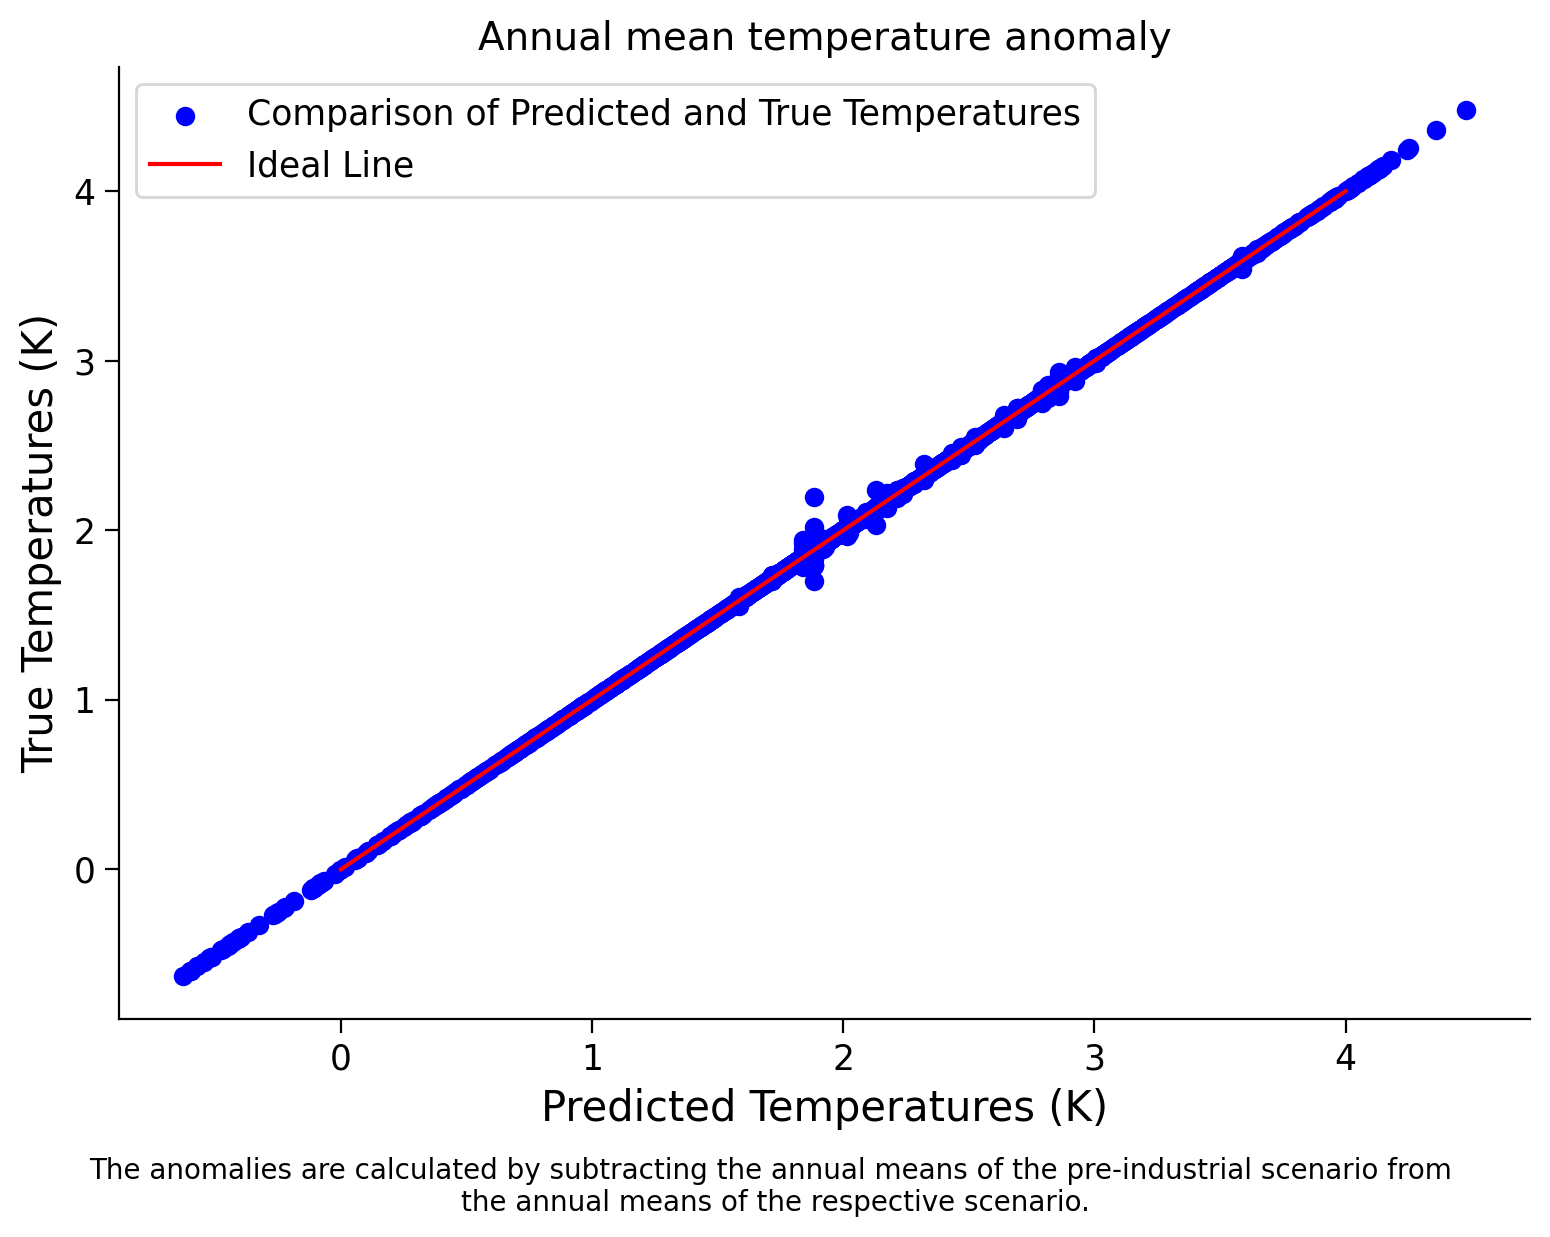

In [16]:
# @title Scatter Plot: Predicted vs. True Temperatures for Decision Tree

# Get predicted values
predicted = dt_regressor.predict(training_data)

# Create scatter plot
plt.scatter(predicted, target, color='b', label='Comparison of Predicted and True Temperatures')
plt.plot([0, 4], [0, 4], color='r', label='Ideal Line')  # Add a diagonal line for reference
plt.xlabel('Predicted Temperatures (K)')
plt.ylabel('True Temperatures (K)')
plt.title('Annual mean temperature anomaly', fontsize=14)

# Add a caption with adjusted y-coordinate to create space
caption_text = 'The anomalies are calculated by subtracting the annual means of the pre-industrial scenario from \nthe annual means of the respective scenario.'
plt.figtext(0.5, -0.03, caption_text, ha='center', fontsize=10)  # Adjusted y-coordinate to create space

plt.legend()
plt.show()

<details>
<summary> <font color='skyblue'>What can we conclude from this score and the scatter plot?<br>
First, pause and think by yourself. Then, compare it with the information provided here:
</font></summary>

As we can see, the model achieves a high score of ~0.9984 on the training data. This indicates that the model can explain approximately 99.84% of the variance in the target variable based on the features in the training dataset. Such a high score suggests that the model fits the training data very well and can effectively capture the underlying patterns or relationships between the features and the target variable. We can see the close alignment between the true value and the value predicted by the model in the plot.

However, it's essential to note that achieving a high score on the training data does not guarantee the model's performance on unseen data (i.e., the test or validation datasets). We will explore this more in the next tutorial.
</details>

---

### Interactive Demo 2.1: Variation in Performance with depth | Visualizing Decision Trees and Scatter plot

In this interactive demo, we'll visualize decision trees using a widget. This widget enables interactive exploration of decision trees by adjusting two parameters:   
`max_depth` controls the tree's complexity during training, while `dt_vis_depth` determines the depth of the tree to visualize. It dynamically trains a decision tree regressor based on `max_depth`, evaluates its performance with a scatter plot, and visualizes the tree structure up to `dt_vis_depth` using the plot_tree function.    
This allows users to balance model complexity and interpretability, gaining insights into how different depths affect predictive accuracy and tree structure.

In [17]:
# @markdown Make sure you execute this cell to enable the widget!
# Don't worry about understanding this code! It's to set up an interactive plot.
# Uncomment the code below to run the widget.

# Function to train decision tree and display scatter plot
def train_and_plot(max_depth, visualize_depth):
    global dt_regressor, training_data

    # Instantiate and train the decision tree regressor
    dt_regressor = DecisionTreeRegressor(max_depth=max_depth)
    dt_regressor.fit(training_data, target)

    # Calculate and print the score
    score = dt_regressor.score(training_data, target)
    print(f"Model Score: {score}")
    print(f"Please wait for ~{visualize_depth+visualize_depth/2} sec for the figure to render")
    # Generate scatter plot: Predicted vs. True Temperatures
    predicted = dt_regressor.predict(training_data)
    fig, axes = plt.subplots(1, 2, figsize=(15+pow(1.3,visualize_depth), 6+pow(1.2,visualize_depth)), gridspec_kw={'width_ratios': [1, 1+visualize_depth/4]})

    # Scatter plot
    axes[0].scatter(predicted, target, color='blue', alpha=0.7, label='Comparison of Predicted and True Temperatures', edgecolors='black')
    axes[0].plot([min(target), max(target)], [min(target), max(target)], color='red', linestyle='--', label='Ideal Prediction Line')
    axes[0].set_xlabel('Predicted Temperature (K)', fontsize=12)
    axes[0].set_ylabel('True Temperature (K)', fontsize=12)
    axes[0].set_title('Annual mean temperature anomaly', fontsize=14)
    axes[0].legend()
    axes[0].grid(True)

    # Decision tree visualization
    plot_tree(dt_regressor, feature_names=training_data.columns, filled=True, fontsize=8, max_depth=visualize_depth, ax=axes[1])
    axes[1].set_title(f'Decision Tree Visualization (Train_max_depth = {max_depth}, dt_visualize_depth = {visualize_depth})')

    plt.tight_layout()
    plt.show()

# Interactive widget to control max_depth
# @widgets.interact(max_depth=(1, 31, 1), dt_vis_depth=(1, 10, 1))
# def visualize_tree_with_max_depth(max_depth=20, dt_vis_depth=3):
#     train_and_plot(max_depth, dt_vis_depth)

### Interactive Demo 2.1 Discussion

1. How does changing the max_depth parameter affect the decision tree's predictive accuracy and complexity?  

2. What insights can be gained by visualizing the decision tree at different depths (dt_vis_depth)?

3. What patterns or trends do you observe in the residuals (differences between predicted and true temperatures) on the scatter plot? How can these insights guide adjustments to improve the model's predictive accuracy?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D4_AIandClimateChange/solutions/W2D4_Tutorial2_Solution_054dc038.py)



In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Discussion_Interactive_Demo_2_1")

## Section 2.2: Training the Random forest and Analyzing the Results

Now we will train an ensemble of decisions trees, known as a random forest. For this we can use the built-in `RandomForestRegressor` from the [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), which we have already imported.

In [19]:
rf_regressor = RandomForestRegressor(random_state=random_state)

The line of code creates a random forest regressor object named `rf_regressor`. This regressor is configured to use a specified `random_state` parameter, ensuring that the random number generation process within the algorithm is consistent across different runs. This helps maintain reproducibility in our experiments and ensures consistent results.

Now you will train the model on our data and calculate its score on the same data. Create a plot like the one above in order to visually inspect its performance

### Coding Exercise 2.2: Model Training and Performance Visualization of Ranodm Forest

In this exercise, you will train a random forest regressor model on your data and evaluate its performance by calculating its score on the same data. Additionally, you will create a scatter plot to visually inspect its performance.

Model Score: 0.9919832143135744


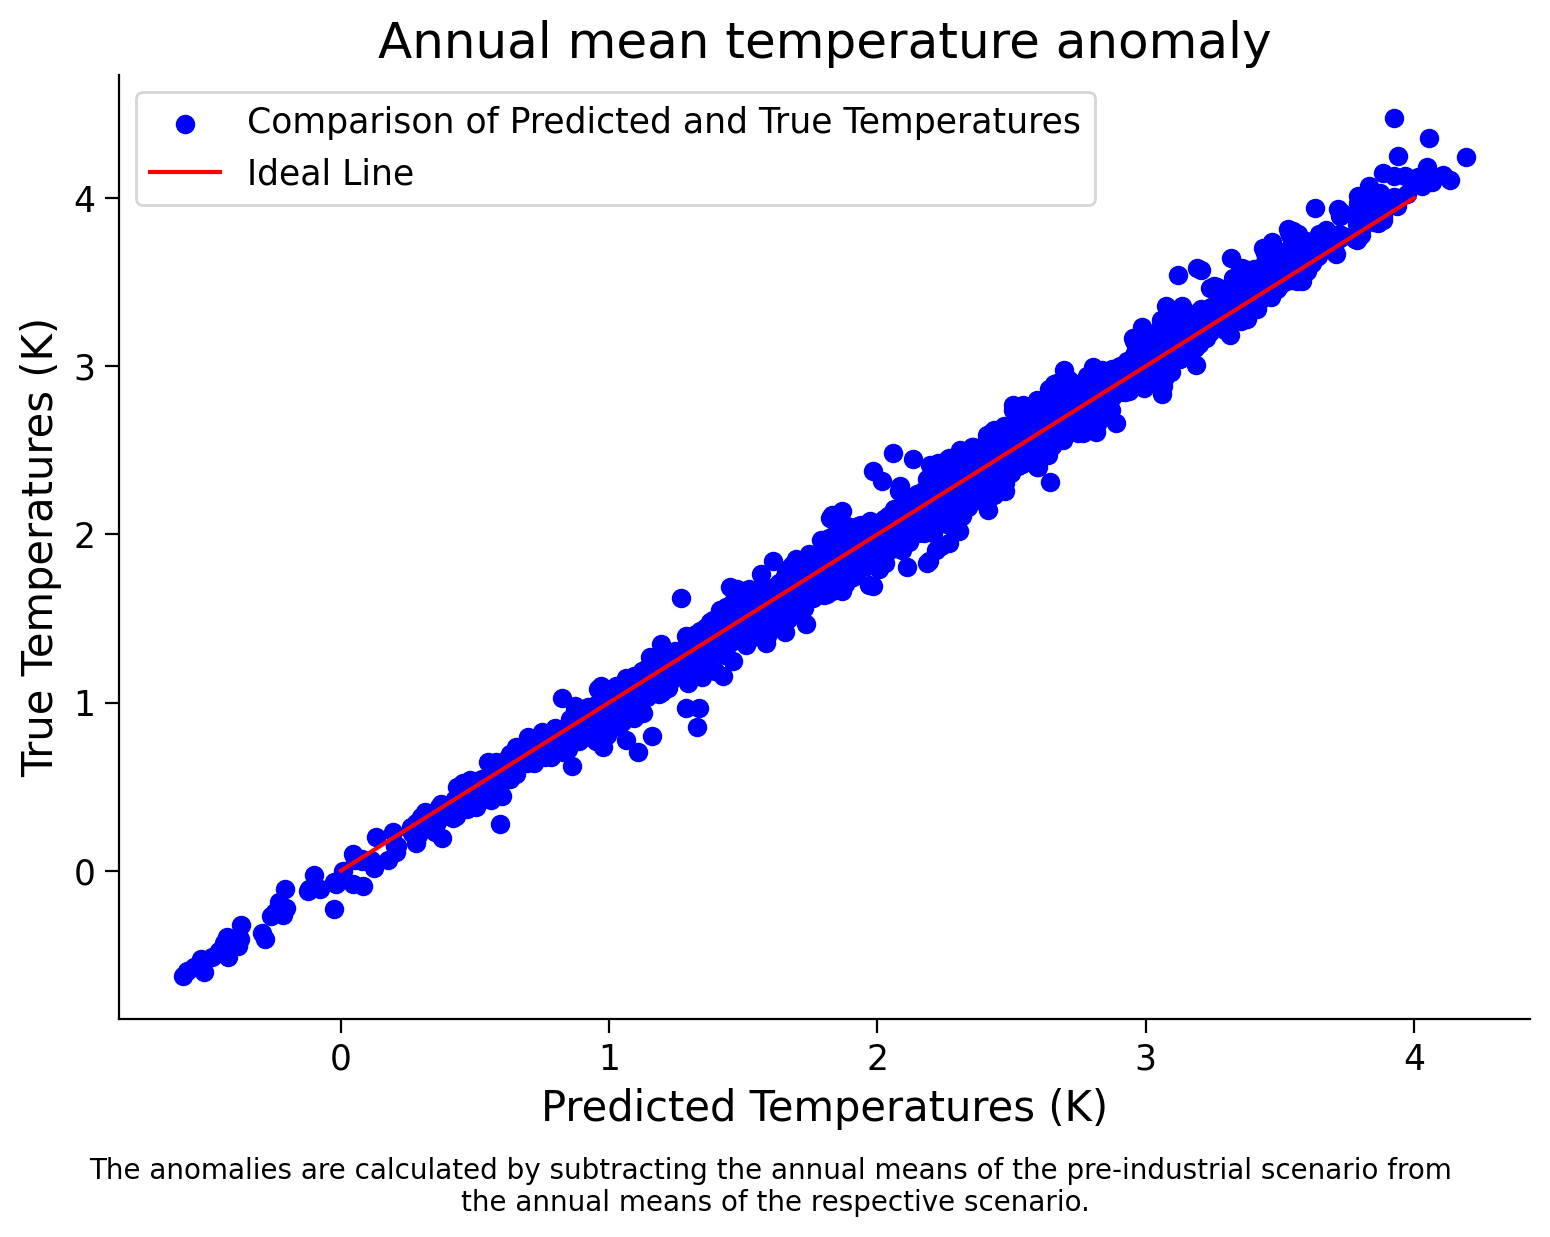

In [21]:
def fit_and_visualize_rf(training_data, target):
    """Fit a random forest regressor to the training data and visualize the results.

    Args:
        training_data (array-like): Input data for training the model.
        target (array-like): Target variable for training the model.

    Returns:
        None
    """
    #################################################
    ## TODO for students: Fit the random forest regressor and visualize the results ##
    # Remove the following line of code once you have completed the exercise:
    # raise NotImplementedError("Student exercise: Fit the random forest regressor and visualize the results.")
    #################################################

    # fit the random forest regressor to the training data
    rf_regressor.fit(training_data, target)

    # print the R-squared score of the model
    score = rf_regressor.score(training_data, target)
    print(f"Model Score: {score}")

    # predict the target variable using the trained model
    predicted = rf_regressor.predict(training_data)

    # Create scatter plot
    plt.scatter(predicted,target,color='b',label='Comparison of Predicted and True Temperatures')
    plt.plot([0,4],[0,4],color='r', label='Ideal Line') # add a diagonal line for reference
    plt.xlabel('Predicted Temperatures (K)')
    plt.ylabel('True Temperatures (K)')
    plt.legend()
    plt.title('Annual mean temperature anomaly')
    # add a caption with adjusted y-coordinate to create space
    caption_text = 'The anomalies are calculated by subtracting the annual means of the pre-industrial scenario from \nthe annual means of the respective scenario.'
    plt.figtext(0.5, -0.03, caption_text, ha='center', fontsize=10)  # adjusted y-coordinate to create space

# test your function
_ = fit_and_visualize_rf(training_data, target)

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D4_AIandClimateChange/solutions/W2D4_Tutorial2_Solution_e2d6fb1e.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=618.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D4_AIandClimateChange/static/W2D4_Tutorial2_Solution_e2d6fb1e_1.png>



In [22]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_2_2")

It seems like our models are performing very well! Let's think a bit more in the next tutorial about what else we should do to evaluate our models...



# Summary

Estimated timing of tutorial: 35 minutes

In this tutorial, we delved into Random Forest Models and their application in climate prediction. We gained an understanding of regression and how Random Forests combine decision trees to improve predictive accuracy. Through practical exercises, we learned how to evaluate model performance and implement Random Forests using tools like scikit-learn.


# Resources

* [ClimateBench v1.0: A Benchmark for Data-Driven Climate Projections](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954)